## Implementing a linked list

Jacob L. Fine

June 24th, 2024

A linked list uses a node structure to effectively 'sew' each element in the list together. Unlike an array (of which the Python list object is an instance of), which stores all elements in a contiguous memory location, a linked list stores each element in a separate node which are scattered throughout memory. In a singly-linked list, each node contains its value and a pointer to the next node. This particular structure allows linked lists to be dynamic in size, which may speeds up certain operations such inserting, deleting, and searching for elements.

Our aim is to create a singly linked list. Unlike the standard list object in Python (which are array-based data structures), we will need to manually create this object. We will then compare its performance for insertions, deletions, and searches. To make a singly-linked list, we will make a Node class to represent each element in the list, storing its value and a pointer to the next node, and then create a LinkedList class to manage the nodes, enabling insertions, deletions, and searches. Afterwards, we will empirically evaluate runtimes for insertions, deletions, and searches.


In [100]:
class Node:
    def __init__(self, value=None):
        # the value stored in the node
        self.value = value
        # a pointer to the next node
        self.next = None

class LinkedList:
    def __init__(self):
        # stores the first node in the list
        self.head = None
        self.tail = None
    
    # append_values a value to the list, i.e., can use LinkedList.append_value(value)
    def append_value(self, value):
        new_node = Node(value)
        # if there is no first node, we set the tail and head to the currently considered node value, and exit
        if self.head is None:
            self.head = new_node
            self.tail = new_node  
            return
        else: 
            # otherwise, we set the value after the current tail to the new node value we want to add
            self.tail.next = new_node
            # afterwards, we update the tail of our linked list to be the most recently added value
            self.tail = new_node  

    def prepend_value(self, value):
        # adds an element to the start of the list, i.e., by updating the head of the list. Since every node just references every other node, we can insert here without needing to shift every element's location in memory
        new_node = Node(value)
        new_node.next = self.head
        self.head = new_node

    def delete_value(self, value):
        # we can now delete a particular value. If the first node is empty, then so is the list, so there is nothing to delete
        if self.head is None:
            return
        # if the value in the head is our value, then we delete it by shifitng its value to the value next in the list, and we end here
        if self.head.value == value:
            self.head = self.head.next
            return
        # if the head was not the node we wanted to delete, we set it to the current_node, and traverse through other nodes.
        current_node = self.head
        # we then traverse through every node, checking if it is our value, and if it is, we shift the list over which effectively deletes it.
        while current_node.next:
            if current_node.next.value == value:
                current_node.next = current_node.next.next
                return
            # otherwise, we keep things as they were by resetting the current_node 
            current_node = current_node.next

    def search_value(self, value):
        # we wish to search_value the index of a particular value. We start by searching from the first ndoe of the list
        current_node = self.head
        # a counter storing the current_node index in the list during our traversal (assuming we start with 0-indexing)
        index = 0
        # if there is value in the node we are looking at
        while current_node:
            # if the node is our value, we return the count from our traversal, which will exactly be our index
            if current_node.value == value:
                return index
            # we then update the current_node we are looking at, and we update our index
            current_node = current_node.next
            index += 1
        return -1

    def show_list(self):
        # we can now show_list the actual linked list using a list object
        elements = []
        # the node we start with is the first node
        current_node = self.head
        # we keep append_valueing the subsequent nodes to the list object until we reach the end of the linked list
        while current_node:
            elements.append(current_node.value)
            current_node = current_node.next
        # we print the elements
        print(elements)


/var/folders/lm/b3fx79250xs42y7mwkvvsfz40000gn/T/ipykernel_34128/2140897029.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
/var/folders/lm/b3fx79250xs42y7mwkvvsfz40000gn/T/ipykernel_34128/2140897029.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend_append.legendHandles[0].set_color('blue')  # sets color for linked list
/var/folders/lm/b3fx79250xs42y7mwkvvsfz40000gn/T/ipykernel_34128/2140897029.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use l

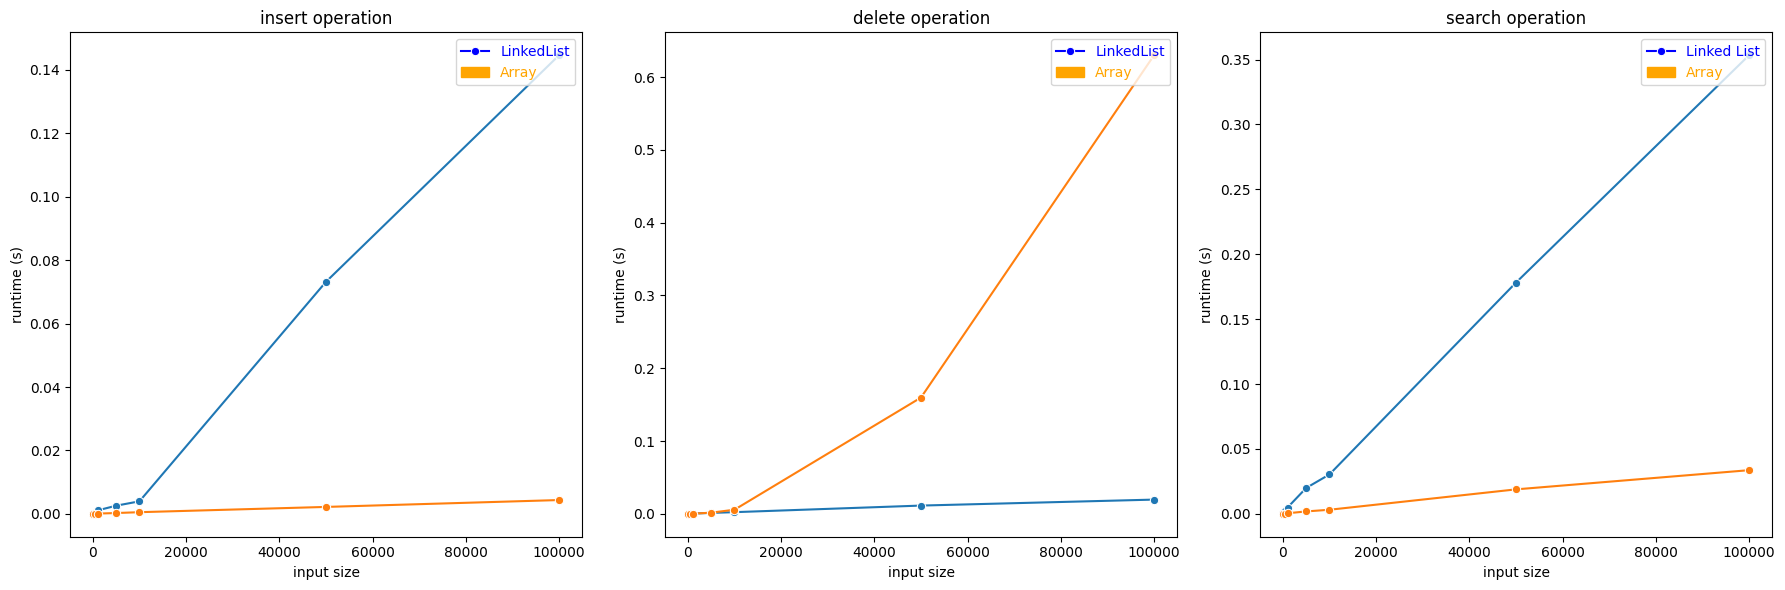

In [102]:
import time
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# We initialize two lists, the linked list class and the standard Python list (an array)
linked_list = LinkedList()
python_list = []

# This will be our dataframe that we store results in
columns = ["operation", "runtime (s)", "data structure", "input size"]
df = pd.DataFrame(columns=columns)

# The function that measures run_times for different operations
def evaluate_runtime(df, operation, run_time, data_structure, size):
    new_row = {"operation": operation, "runtime (s)": run_time, "data structure": data_structure, "input size": size}
    return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Input sizes to consider
test_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000] 

# Iterate through each input size and compare the two data structures
for size in test_sizes:
    test_values = [random.randint(1, 50) for _ in range(size)]
    
    # these three blocks are for measuring insertions, search, and delete for the linked list
    start_time = time.time()
    for value in test_values:
        linked_list.append_value(value)
    append_time = time.time() - start_time
    df = evaluate_runtime(df, "insert", append_time, "Linked List", size)


    start_time = time.time()
    for value in test_values:
        linked_list.search_value(value)
    search_time = time.time() - start_time
    df = evaluate_runtime(df, "search", search_time, "Linked List", size)

    start_time = time.time()
    for value in test_values:
        linked_list.delete_value(value)
    delete_time = time.time() - start_time
    df = evaluate_runtime(df, "delete", delete_time, "Linked List", size)


    # these three blocks are for measuring insertions, search, and delete for the standard array
    start_time = time.time()
    for value in test_values:
        python_list.append(value)
    append_time = time.time() - start_time
    df = evaluate_runtime(df, "insert", append_time, "Array", size)


    start_time = time.time()
    for value in test_values:
        python_list.index(value)
    search_time = time.time() - start_time
    df = evaluate_runtime(df, "search", search_time, "Array", size)

    start_time = time.time()
    for value in test_values:
        if value in python_list:
            python_list.remove(value)
    delete_time = time.time() - start_time
    df = evaluate_runtime(df, "delete", delete_time, "Array", size)


# Plotting the figure with the results below
plt.figure(figsize=(18, 6)) 

# Plot for insert operation
plt.subplot(1, 3, 1)
sns.lineplot(x="input size", y="runtime (s)", hue="data structure", style="operation",
             markers=True, dashes=False,
             data=df[df['operation'] == 'insert'])
plt.title('insert operation')
plt.xlabel('input size')
plt.ylabel('runtime (s)')
# creates a custom legend with desired properties
legend_append = plt.legend(labels=["LinkedList", "Array"], title=None, loc='upper right')
legend_append.legendHandles[0].set_color('blue')  # sets color for linked list
legend_append.legendHandles[1].set_color('orange')  # sets color for array
legend_append.get_texts()[0].set_color('blue')  # labels the linkedlist legend item
legend_append.get_texts()[1].set_color('orange')  # labels the array legend item

# Plot for delete operation
plt.subplot(1, 3, 2)
sns.lineplot(x="input size", y="runtime (s)", hue="data structure", style="operation",
             markers=True, dashes=False,
             data=df[df['operation'] == 'delete'])
plt.title('delete operation')
plt.xlabel('input size')
plt.ylabel('runtime (s)')
legend_delete = plt.legend(labels=["LinkedList", "Array"], title=None, loc='upper right')
legend_delete.legendHandles[0].set_color('blue')  
legend_delete.legendHandles[1].set_color('orange') 
legend_delete.get_texts()[0].set_color('blue') 
legend_delete.get_texts()[1].set_color('orange')  

# Plot for search operation
plt.subplot(1, 3, 3)
sns.lineplot(x="input size", y="runtime (s)", hue="data structure", style="operation",
             markers=True, dashes=False,
             data=df[df['operation'] == 'search'])
plt.title('search operation')
plt.xlabel('input size')
plt.ylabel('runtime (s)')
legend_search = plt.legend(labels=["Linked List", "Array"], title=None, loc='upper right')
legend_search.legendHandles[0].set_color('blue') 
legend_search.legendHandles[1].set_color('orange')  
legend_search.get_texts()[0].set_color('blue')  
legend_search.get_texts()[1].set_color('orange')  

plt.tight_layout()
plt.show()